### Context
Our client is an Insurance company that has provided Health Insurance to its customers.Now they need help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.¶

#### Data description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
%matplotlib inline

In [2]:
train_data= pd.read_csv('train.csv')

In [3]:
test_data=pd.read_csv('Test.csv')

## Data Preprocessing

In [4]:
# First few records of train data
train_data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# Last few records of train data
train_data.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# First few records of test data
test_data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
# Last few records of test data
test_data.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231


#### Let us remove id column from both train and test data

In [8]:
train_data=train_data.drop(['id'],axis=1)
test_data=test_data.drop(['id'],axis=1)

In [9]:
train_data.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [10]:
test_data.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


### from the description region code did not give much information. I consider to drop it.

In [11]:
train_data=train_data.drop(['Region_Code'],axis=1)
test_data=test_data.drop(['Region_Code'],axis=1)

In [12]:
# Dimensions of the train data
train_data.shape

(381109, 10)

In [13]:
# Dimensions of the test data
test_data.shape

(127037, 9)

In [14]:
#summary statistics
train_data.describe()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
# check the value counts of target varable
#train_data['Response'].value_counts(normalize=True)

In [16]:
#identifying categorical variables
cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
num_cols  = [col for col in train_data.columns if train_data[col].dtype in ['int64','float64']]
print("Categorical Columns:")
print(cat_cols)
print("Numerical Columns:")
print(num_cols)

Categorical Columns:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']
Numerical Columns:
['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [17]:
#encoding
train_data.loc[train_data['Gender']=='Male','Gender']=1
train_data.loc[train_data['Gender']=='Female','Gender']=0
test_data.loc[test_data['Gender']=='Male','Gender']=1
test_data.loc[test_data['Gender']=='Female','Gender']=0

In [18]:
train_data.loc[train_data['Vehicle_Age']=='> 2 Years','Vehicle_Age']=2
train_data.loc[train_data['Vehicle_Age']=='1-2 Year','Vehicle_Age']=1
train_data.loc[train_data['Vehicle_Age']=='< 1 Year','Vehicle_Age']=0
test_data.loc[test_data['Vehicle_Age']=='> 2 Years','Vehicle_Age']=2
test_data.loc[test_data['Vehicle_Age']=='1-2 Year','Vehicle_Age']=1
test_data.loc[test_data['Vehicle_Age']=='< 1 Year','Vehicle_Age']=0


In [19]:
train_data.loc[train_data['Vehicle_Damage']=='Yes','Vehicle_Damage']=1
train_data.loc[train_data['Vehicle_Damage']=='No','Vehicle_Damage']=0
test_data.loc[test_data['Vehicle_Damage']=='Yes','Vehicle_Damage']=1
test_data.loc[test_data['Vehicle_Damage']=='No','Vehicle_Damage']=0

In [20]:
train_data.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,0,2,1,40454.0,26.0,217,1
1,1,76,1,0,1,0,33536.0,26.0,183,0
2,1,47,1,0,2,1,38294.0,26.0,27,1
3,1,21,1,1,0,0,28619.0,152.0,203,0
4,0,29,1,1,0,0,27496.0,152.0,39,0


In [21]:
#type conversion
for col in train_data.columns:
    train_data[col]=train_data[col].astype(np.int64)
train_data    

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,0,2,1,40454,26,217,1
1,1,76,1,0,1,0,33536,26,183,0
2,1,47,1,0,2,1,38294,26,27,1
3,1,21,1,1,0,0,28619,152,203,0
4,0,29,1,1,0,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,1,1,0,30170,26,88,0
381105,1,30,1,1,0,0,40016,152,131,0
381106,1,21,1,1,0,0,35118,160,161,0
381107,0,68,1,0,2,1,44617,124,74,0


## EDA

### Target variable distribution

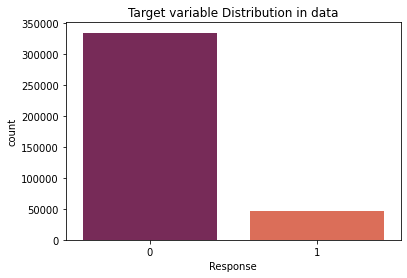

In [22]:
sns.countplot(train_data['Response'],palette='rocket')
plt.title("Target variable Distribution in data");

#### It is clear that, our data is highly imbalanced

### Gender 

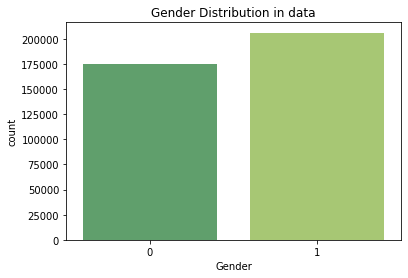

In [23]:
sns.countplot(train_data['Gender'],palette='summer')
plt.title("Gender Distribution in data");

Here female=0  and male=1
##### Comparitively There are more samples of gender male

## Age

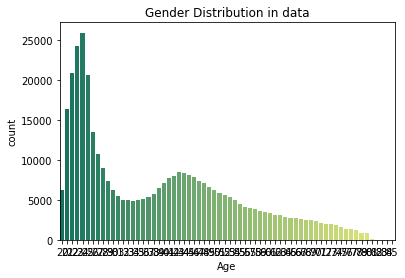

In [24]:
sns.countplot(train_data['Age'],palette='summer')
plt.title("Gender Distribution in data");

Age distribution according to Response


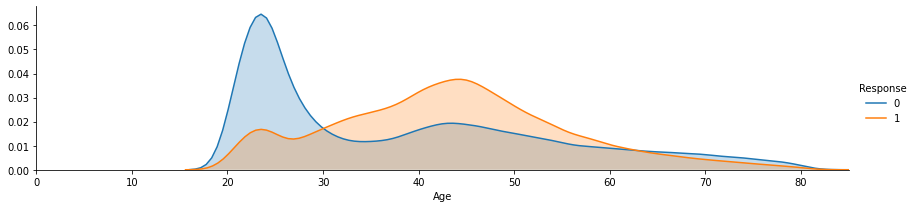

In [25]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(train_data,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,train_data["Age"].max()))
facetgrid.add_legend();

### Previously_Insured

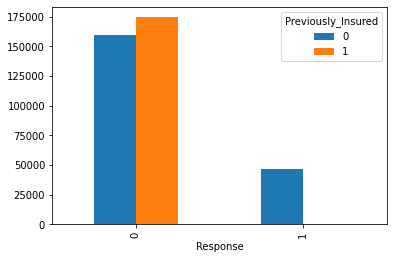

In [26]:
pd.crosstab(train_data['Response'], train_data['Previously_Insured']).plot(kind='bar');


### Vehicle age

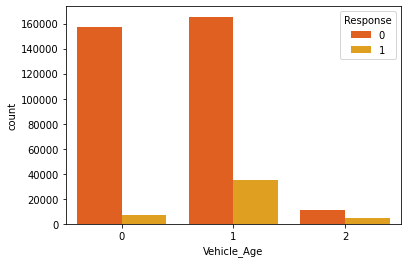

In [27]:
sns.countplot(train_data['Vehicle_Age'],hue=train_data['Response'],palette='autumn');


### vehicle damage

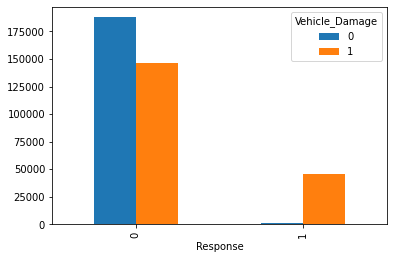

In [28]:
pd.crosstab(train_data['Response'], train_data['Vehicle_Damage']).plot(kind='bar');

In [29]:
#seperating target variable from the train data
X= train_data.drop(['Response'], axis = 1)
y= train_data["Response"]

In [30]:
X.head(3)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,0,2,1,40454,26,217
1,1,76,1,0,1,0,33536,26,183
2,1,47,1,0,2,1,38294,26,27


In [31]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## MODEL BUILDING

### 1.LOGISTIC REGRESSION

### Creating a logit model, fitting and checking the summary

In [33]:
import statsmodels.api as sm

In [34]:
logit=sm.Logit(y_train,X_train)

In [35]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.277779
         Iterations 11


In [36]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.251      
Dependent Variable:  Response          AIC:               148227.6701
Date:                2021-08-13 10:45  BIC:               148322.1176
No. Observations:    266776            Log-Likelihood:    -74105.    
Df Model:            8                 LL-Null:           -98995.    
Df Residuals:        266767            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      11.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Gender                0.0822   0.0132   6.2254 0.0000  0.0563  0.1081
Age                  -0.0241   0.0006 -39.3683 0.0000 -0.0253 -0.0229
Driving_License      -2.0832   0.0436 -47.7762 0.0000 -2.1687 -1.9977
Previously_Insured   -4.3188   0.1016 -42.5117 0.0000 -4.5179 -4.1197
Vehicle_Age           0.7122   0.0155  45.8537 0.0000  0.6818  0.7426
Vehicle_Damage        1.6869   0.0344  48.9823 0.0000  1.6194  1.7544
Annual_Premium        0.0000   0.0000   1.6981 0.0895 -0.0000  0.0000
Policy_Sales_Channel -0.0035   0.0001 -27.1507 0.0000 -0.0037 -0.0032
Vintage              -0.0002   0.0001  -2.9420 0.0033 -0.0004 -0.0001
=====================================================================

"""

In [37]:
tes_pred=logit.predict(params=result.params,exog=X_test)

In [38]:
tes_pred[0:10]

array([0.00057259, 0.26578235, 0.31441994, 0.03591643, 0.21457224,
       0.00051627, 0.43154894, 0.00055759, 0.16604962, 0.25653758])

In [39]:
len(tes_pred)

114333

In [40]:
print(tes_pred.min(),tes_pred.max())

0.00023162486019862592 0.8447003520914899


In [41]:
###Classification at Threshhold of 0.5
tes_pred1=[]
for i in tes_pred:
    if i<0.5:
        tes_pred1.append(0)
    else:
        tes_pred1.append(1)
        

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
confusion_matrix(y_true=y_test,y_pred=tes_pred1)

array([[99968,   227],
       [14061,    77]])

In [44]:
#ROC Curves to identify best threshold
from sklearn.metrics import roc_curve


In [45]:

tr_pred=logit.predict(params=result.params,exog=X_train)


In [46]:

fpr,tpr,thresholds=roc_curve(y_true=y_train,y_score=tr_pred)


In [47]:
res=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})


In [48]:

res[200:220]

,FPR,TPR,Threshold
200,0.002417,0.004267,0.500375
201,0.002417,0.004329,0.500236
202,0.002430,0.004329,0.500024
203,0.002430,0.004360,0.500004
204,0.002434,0.004360,0.499993
205,0.002434,0.004390,0.499948
206,0.002459,0.004390,0.499504
207,0.002459,0.004421,0.499502
208,0.002476,0.004421,0.499166
209,0.002476,0.004452,0.499126


### Plotting the ROC curve using matplotlib

No handles with labels found to put in legend.


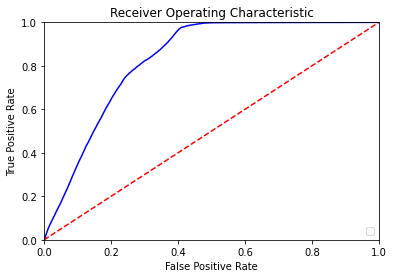

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Tweaking the threshold by observing the tpr and fpr rates from the data frame created above and checking the recall for class 1

In [50]:
tes_pred1=[]
for i in tes_pred:
    if i<0.09:
        tes_pred1.append(0)
    else:
        tes_pred1.append(1)

In [51]:
confusion_matrix(y_true=y_test,y_pred=tes_pred1)

array([[59211, 40984],
       [  311, 13827]])

In [52]:
print(classification_report(y_true=y_test,y_pred=tes_pred1))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100195
           1       0.25      0.98      0.40     14138

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



### Using logisitic regression from sklearn. Observe the parameters

In [53]:
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()
logmod

LogisticRegression()

In [54]:
log_mod=logmod.fit(X_train,y_train)
print(log_mod.coef_)
print(log_mod.intercept_)

[[-5.13664352e-05 -1.15410192e-02 -3.24800424e-04 -1.36597184e-03
   3.65548321e-04  1.10355975e-03 -5.40523617e-06 -1.06518759e-02
  -1.34012514e-03]]
[-0.00033215]


In [55]:
test_pred=log_mod.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=test_pred)

array([[100195,      0],
       [ 14138,      0]])

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y, log_mod.predict_proba(X)[:, 1])

0.5927613344031232

### 2. DECISION TREES

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=10)

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [7,10,12,15,20,24,27],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes' : [5,10,12,20],
    'ccp_alpha' : [0.1,0.01,0.001,0.0001],
    'class_weight' : ['balanced','None']
}

In [61]:
dt_gs = GridSearchCV(estimator= DecisionTreeClassifier(), 
                    param_grid= param_grid,
                     cv = 3)

In [62]:
dt_gs.fit(X_train, y_train)

/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 902, in fit
    X_idx_sorted=X_idx_sorted)
  File "/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 209, in fit
    self.class_weight, y_original)
  File "/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 123, in compute_sample_weight
    '"balanced". Given "%s".' % class

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001],
                         'class_weight': ['balanced', 'None'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 10, 12, 15, 20, 24, 27],
                         'max_leaf_nodes': [5, 10, 12, 20],
                         'min_samples_leaf': [1, 5, 10]})

In [63]:
dt_gs.best_params_

{'ccp_alpha': 0.01,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1}

In [64]:
best_model = dt_gs.best_estimator_

In [65]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [66]:
print("Accuracy on training set: {:.3f}".format(dt_gs.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(dt_gs.score(X_test, y_test)))

Accuracy on training set: 0.709
Accuracy on testing set: 0.712


In [67]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81    234204
           1       0.28      0.89      0.43     32572

    accuracy                           0.71    266776
   macro avg       0.63      0.79      0.62    266776
weighted avg       0.89      0.71      0.76    266776



In [68]:
from sklearn import tree

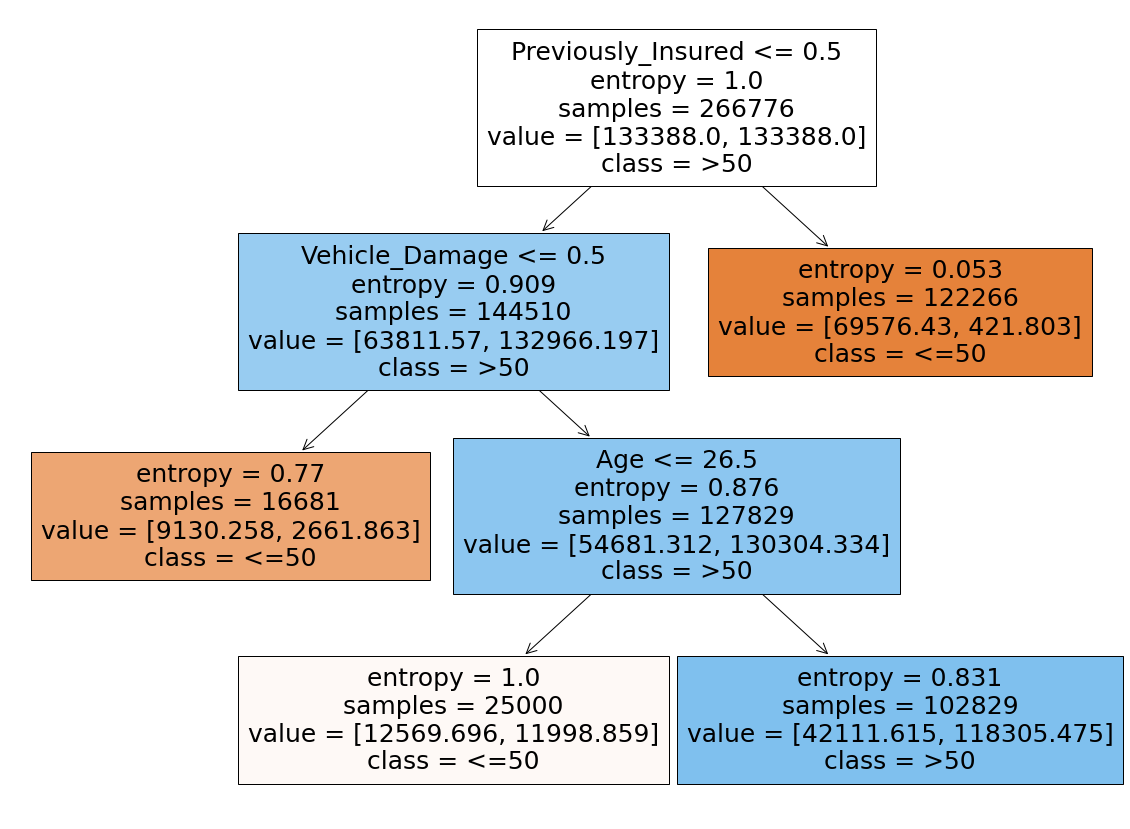

In [69]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(best_model, 
                   feature_names=X_train.columns,
                   class_names=['<=50','>50'],
                   filled=True)

In [70]:
importances = dt_gs.best_estimator_.feature_importances_
print(importances)

[0.         0.04398279 0.         0.87531342 0.         0.0807038
 0.         0.         0.        ]


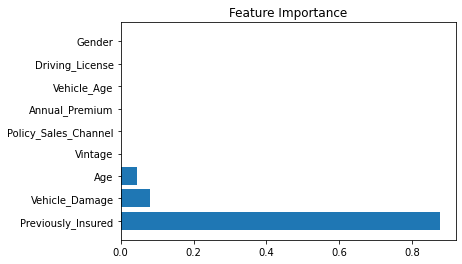

In [71]:
# Ploting the top 10 features

importances = dt_gs.best_estimator_.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1])[0:10], importances[indices][0:10])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1])[0:10], names[0:10], rotation =0)

# Show plot
plt.show()

    #### from feature importance, we can see that "Previously_Insured" is the most important  variable and we can also consider "Age" and "Vehicle_Damage"